# Load some modules

In [1]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('../../')
from draw_embeddings import draw_embeddings

In [3]:
# Disable warnings output (TSNE outputs one very time)
import warnings
warnings.filterwarnings('ignore')

# Load the covariates data

In [4]:
classes = pd.read_csv("../ExposomeChallengeData/datasets/covariates_cat.csv", index_col=0)
classes.head()

,cohort,age,sex,education,native,parity
1,3,1,0,1,2,0
2,3,2,0,2,2,1
3,3,1,0,2,2,1
4,1,4,1,0,2,1
5,2,4,0,0,2,0


# Load the exposome data

In [5]:
exposome = pd.read_csv("../ExposomeChallengeData/datasets/exposome.csv", index_col=0).iloc[:,1:]
exposome.head()

,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,hs_pm10_yr_hs_h_None,...,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
1,0.896711,2.872304,25.948498,17.433798,2.530279,2.583284,2.612098,22.535828,20.850005,31.399067,...,1,2,-5.629052,0.345830,21.213987,135.995760,24.914911,-2.975930,-0.536713,0.288073
2,0.892538,2.980008,25.897739,18.470850,1.928600,2.652479,2.761064,14.077763,29.141274,31.250535,...,0,0,-5.045588,0.345830,22.649684,97.884416,27.905292,-2.975930,1.078750,3.195478
3,0.778723,3.056501,26.087347,18.711547,2.882591,2.591756,2.356163,46.859096,31.530981,27.516001,...,0,1,-4.204225,145.572759,25.549436,127.536143,29.299706,-1.604450,1.188758,3.023924
4,0.089056,3.089157,14.991380,16.409771,1.390750,2.456717,2.403247,29.817442,25.232778,23.965263,...,1,1,-3.088010,187.120021,22.743850,114.868483,22.743850,2.748819,3.636813,3.839335
5,0.604781,3.848211,35.197296,14.889958,3.204449,3.499594,3.307663,29.817442,24.891465,24.754238,...,0,0,-1.459250,158.489039,29.872070,205.774781,14.131454,4.262137,3.027843,4.572734


Min-max normalize the data and show the 2D t-SNE representation, labeled by cohort group.
It is evident that there is a strong batch effect.

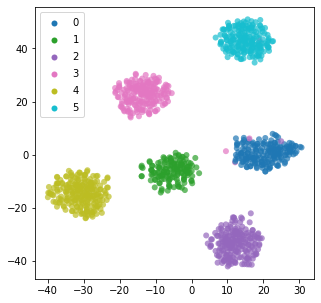

In [6]:
exposome.iloc[:,:] = MinMaxScaler().fit_transform(exposome)

tsne = TSNE(n_components=2, init='pca')
uncorrected_tsne = tsne.fit_transform(exposome)

draw_embeddings(uncorrected_tsne, classes.cohort)

# Correct for the batch effect

Subset the data by cohort group and standarize each subset individually, then rejoin the data and min-max normalize it.

In [7]:
exposome = pd.read_csv("../ExposomeChallengeData/datasets/exposome.csv", index_col=0).iloc[:,1:]
exposome.head()

,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,hs_pm10_yr_hs_h_None,...,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
1,0.896711,2.872304,25.948498,17.433798,2.530279,2.583284,2.612098,22.535828,20.850005,31.399067,...,1,2,-5.629052,0.345830,21.213987,135.995760,24.914911,-2.975930,-0.536713,0.288073
2,0.892538,2.980008,25.897739,18.470850,1.928600,2.652479,2.761064,14.077763,29.141274,31.250535,...,0,0,-5.045588,0.345830,22.649684,97.884416,27.905292,-2.975930,1.078750,3.195478
3,0.778723,3.056501,26.087347,18.711547,2.882591,2.591756,2.356163,46.859096,31.530981,27.516001,...,0,1,-4.204225,145.572759,25.549436,127.536143,29.299706,-1.604450,1.188758,3.023924
4,0.089056,3.089157,14.991380,16.409771,1.390750,2.456717,2.403247,29.817442,25.232778,23.965263,...,1,1,-3.088010,187.120021,22.743850,114.868483,22.743850,2.748819,3.636813,3.839335
5,0.604781,3.848211,35.197296,14.889958,3.204449,3.499594,3.307663,29.817442,24.891465,24.754238,...,0,0,-1.459250,158.489039,29.872070,205.774781,14.131454,4.262137,3.027843,4.572734


In [8]:
for c in set(classes.cohort):
    index = classes.cohort == c
    exposome.loc[index, :] = StandardScaler().fit_transform(exposome.loc[index, :])

exposome.head()

,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,hs_pm10_yr_hs_h_None,...,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
1,0.612471,-0.162427,0.413117,0.005388,-0.122107,-0.251583,-0.058832,-0.639409,-1.199875,0.127235,...,1.199593,1.960392,-1.679367,-0.923121,-0.132220,0.385363,0.395649,-1.262770,-0.912914,-1.157698
2,0.588892,0.342554,0.393987,0.470303,-1.305637,-0.027899,0.690634,-1.149192,-0.443058,0.071537,...,-0.833616,-0.840168,-1.066079,-0.923121,0.129149,-0.643885,0.931527,-1.262770,0.452355,1.030136
3,-0.054187,0.701201,0.465446,0.578209,0.570907,-0.224196,-1.346480,0.826599,-0.224929,-1.328874,...,-0.833616,0.560112,-0.181710,1.418667,0.657048,0.156900,1.181407,-0.047921,0.545326,0.901040
4,-0.882230,0.494857,-0.997888,-0.485986,-0.810219,0.932391,1.128274,0.754423,0.248162,0.755680,...,1.709109,0.679994,0.595396,3.229365,1.513367,0.280544,1.530870,0.422748,1.425965,1.189503
5,-0.953572,0.522372,1.657370,-0.134044,-0.475724,0.014713,-0.177229,-0.277000,-0.764190,-1.049775,...,-0.768473,-0.833369,0.583446,0.930029,0.893083,1.259609,-1.434041,-0.454076,0.639758,-0.349087


In [9]:
exposome.iloc[:,:] = MinMaxScaler().fit_transform(exposome)
exposome.head()

,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,hs_pm10_yr_hs_h_None,...,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
1,0.566453,0.416136,0.444786,0.497391,0.618106,0.442270,0.594844,0.279071,0.275210,0.306145,...,0.807087,0.499567,0.400776,0.211466,0.350886,0.468451,0.394203,0.482458,0.598862,0.249862
2,0.563574,0.495063,0.442465,0.575386,0.465155,0.466713,0.655715,0.221738,0.330068,0.301455,...,0.185984,0.043001,0.456994,0.211466,0.388829,0.316925,0.461888,0.482458,0.750712,0.453235
3,0.485044,0.551118,0.451135,0.593489,0.707666,0.445262,0.490263,0.443946,0.345879,0.183539,...,0.185984,0.271284,0.538060,0.575146,0.465464,0.434817,0.493450,0.606040,0.761052,0.441235
4,0.383928,0.518867,0.273590,0.414957,0.529180,0.571649,0.691260,0.435828,0.380171,0.359060,...,0.962733,0.290828,0.609293,0.856349,0.589776,0.453020,0.537590,0.653920,0.859000,0.468049
5,0.375216,0.523168,0.595750,0.474000,0.572407,0.471369,0.585228,0.319829,0.306791,0.207039,...,0.205884,0.044110,0.608198,0.499261,0.499729,0.597159,0.163098,0.564723,0.771555,0.325027


In [10]:
tsne = TSNE(n_components=2, init='pca')
corrected_tsne = tsne.fit_transform(exposome)

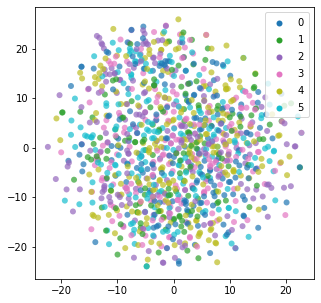

In [11]:
draw_embeddings(corrected_tsne, classes.cohort)

# Save the corrected data set

In [12]:
exposome.to_csv("../ExposomeChallengeData/datasets/exposome_corrected_minmax.csv")